# Importing Libraries

In [233]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Reading the Data

In [234]:
#Get current working directory
pwd = os.getcwd()
pwd

'e:\\Hemant\\Data Science\\Portfolio Projects\\Squadstack Activity\\scripts'

In [235]:
#Store filepath as it might be helpful further along
filepath = os.path.join(os.path.dirname(pwd), 'data', 'agent_followup_data.csv')
filepath

'e:\\Hemant\\Data Science\\Portfolio Projects\\Squadstack Activity\\data\\agent_followup_data.csv'

In [236]:
#Read the csv file
df_import = pd.read_csv(filepath)
df_import.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [237]:
#Maintain a copy of the file so that if any wrong changes are done then I can roll back to the original data
df = df_import.copy()

In [238]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68354 entries, 0 to 68353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               68354 non-null  int64 
 1   followup_date    68354 non-null  object
 2   lead_created_at  68354 non-null  object
 3   leadId           68354 non-null  int64 
 4   followup_type    68354 non-null  object
 5   agentId          68354 non-null  int64 
 6   additional_data  68354 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.7+ MB


In [239]:
df.shape

(68354, 7)

Important to check if any null values are present. 

In [240]:
df.isnull().sum()

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64

Dataset has no null values and hence can proceed with data wrangling.

## Number of Follow ups per AgentID

In [241]:
#Count the number of follow ups for each AgentID
num_follow_ups = df['agentId'].value_counts()

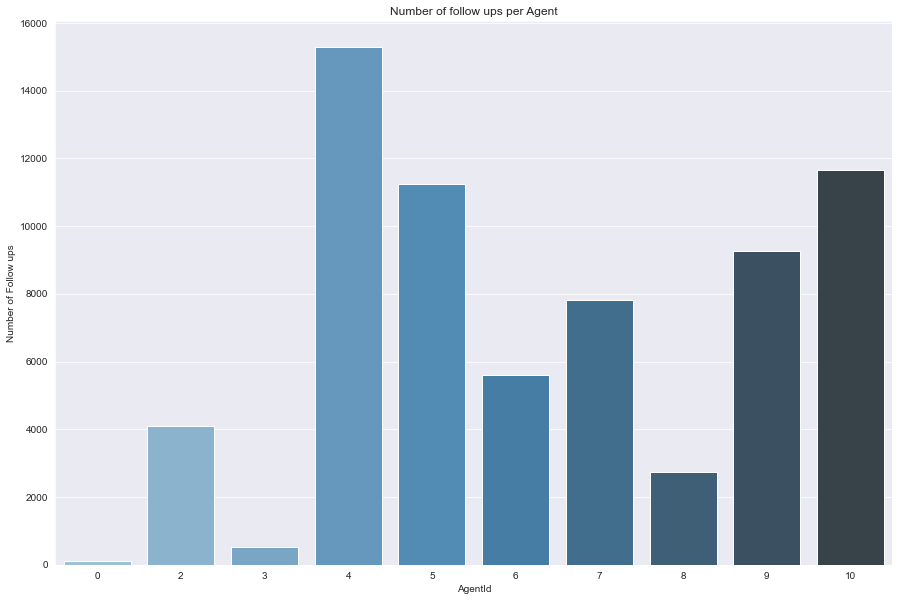

In [242]:
#Count of followups by each agent. 
plt.figure(figsize=(15,10))
ax = sns.countplot(x = df['agentId'], palette='Blues_d')
ax.set_title('Number of follow ups per Agent')
ax.set_xlabel('AgentId')
ax.set_ylabel('Number of Follow ups')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Number of Follow ups per Agent.png'))

In [243]:
#Another way to represent this would be in percentage i.e. what percentage of all followups are done by each agent. 
perc_follow_ups = (df['agentId'].value_counts(normalize = True)*100).round(2)
perc_follow_ups

4     22.37
10    17.05
5     16.45
9     13.58
7     11.44
6      8.20
2      5.98
8      4.00
3      0.77
0      0.17
Name: agentId, dtype: float64

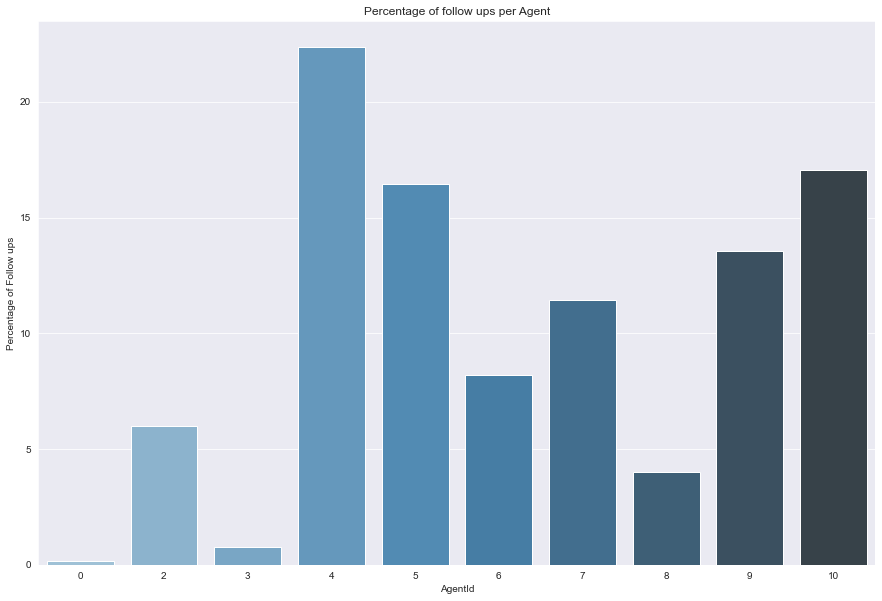

In [244]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = perc_follow_ups.index, y = perc_follow_ups.values, palette='Blues_d')
ax.set_title('Percentage of follow ups per Agent')
ax.set_xlabel('AgentId')
ax.set_ylabel('Percentage of Follow ups')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Percentage of Follow Ups.png'))

## Number of Distinct Leads per Agent

In [245]:
#Find number of leads per agentID. That could be a good indicator of the agent performance. 
leads_per_agent = df.groupby('agentId')['leadId'].nunique()
leads_per_agent

agentId
0        5
2      874
3      343
4     1599
5      398
6      351
7      364
8      568
9      876
10    1425
Name: leadId, dtype: int64

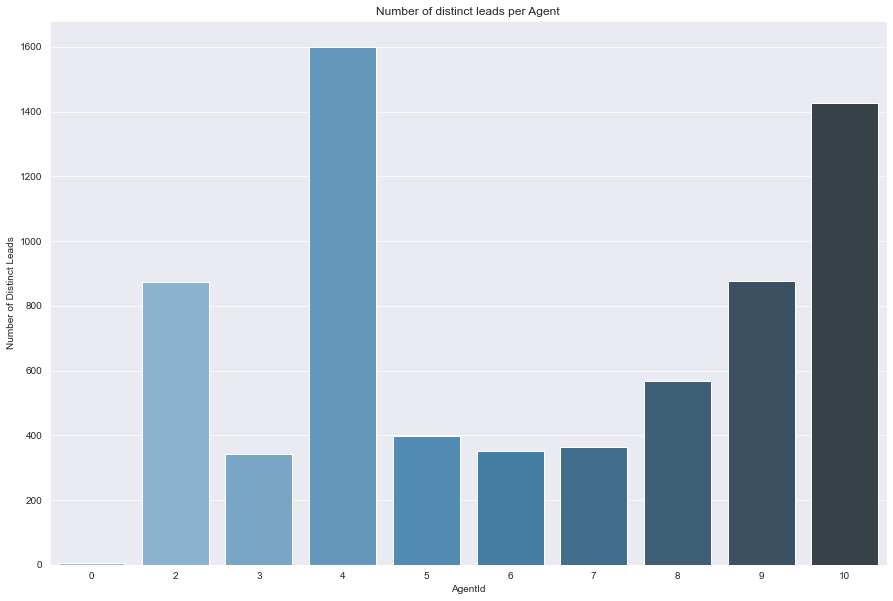

In [246]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = leads_per_agent.index, y = leads_per_agent.values, palette='Blues_d')
ax.set_title('Number of distinct leads per Agent')
ax.set_xlabel('AgentId')
ax.set_ylabel('Number of Distinct Leads')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Number of Distinct Leads per Agent.png'))

## Follow up Type broken down by each Agent

In [247]:
calls = df[df['followup_type'] == 'calls']
emails = df[df['followup_type'] == 'emails']
texts = df[df['followup_type'] == 'textmessages']

In [248]:
texts_count = texts.groupby('agentId')['id'].count()

In [249]:
calls_count = calls.groupby('agentId')['id'].count()
calls_count

agentId
2       65
4     1087
5        6
6      210
7      183
8      293
9      814
10     647
Name: id, dtype: int64

In [250]:
emails_count = emails.groupby('agentId')['id'].count()

In [251]:
count_df = pd.DataFrame({'Calls' : calls_count, 'Texts':texts_count, 'Emails':emails_count})
count_df.head()

,Calls,Texts,Emails
agentId,,,
0,NaN,115,NaN
2,65.0,315,3706.0
3,NaN,13,516.0
4,1087.0,7063,7140.0
5,6.0,170,11065.0


In [252]:
count_df.fillna(0, inplace=True)

In [253]:
count_df

,Calls,Texts,Emails
agentId,,,
0,0.0,115,0.0
2,65.0,315,3706.0
3,0.0,13,516.0
4,1087.0,7063,7140.0
5,6.0,170,11065.0
6,210.0,3140,2256.0
7,183.0,2429,5207.0
8,293.0,494,1945.0
9,814.0,1175,7292.0


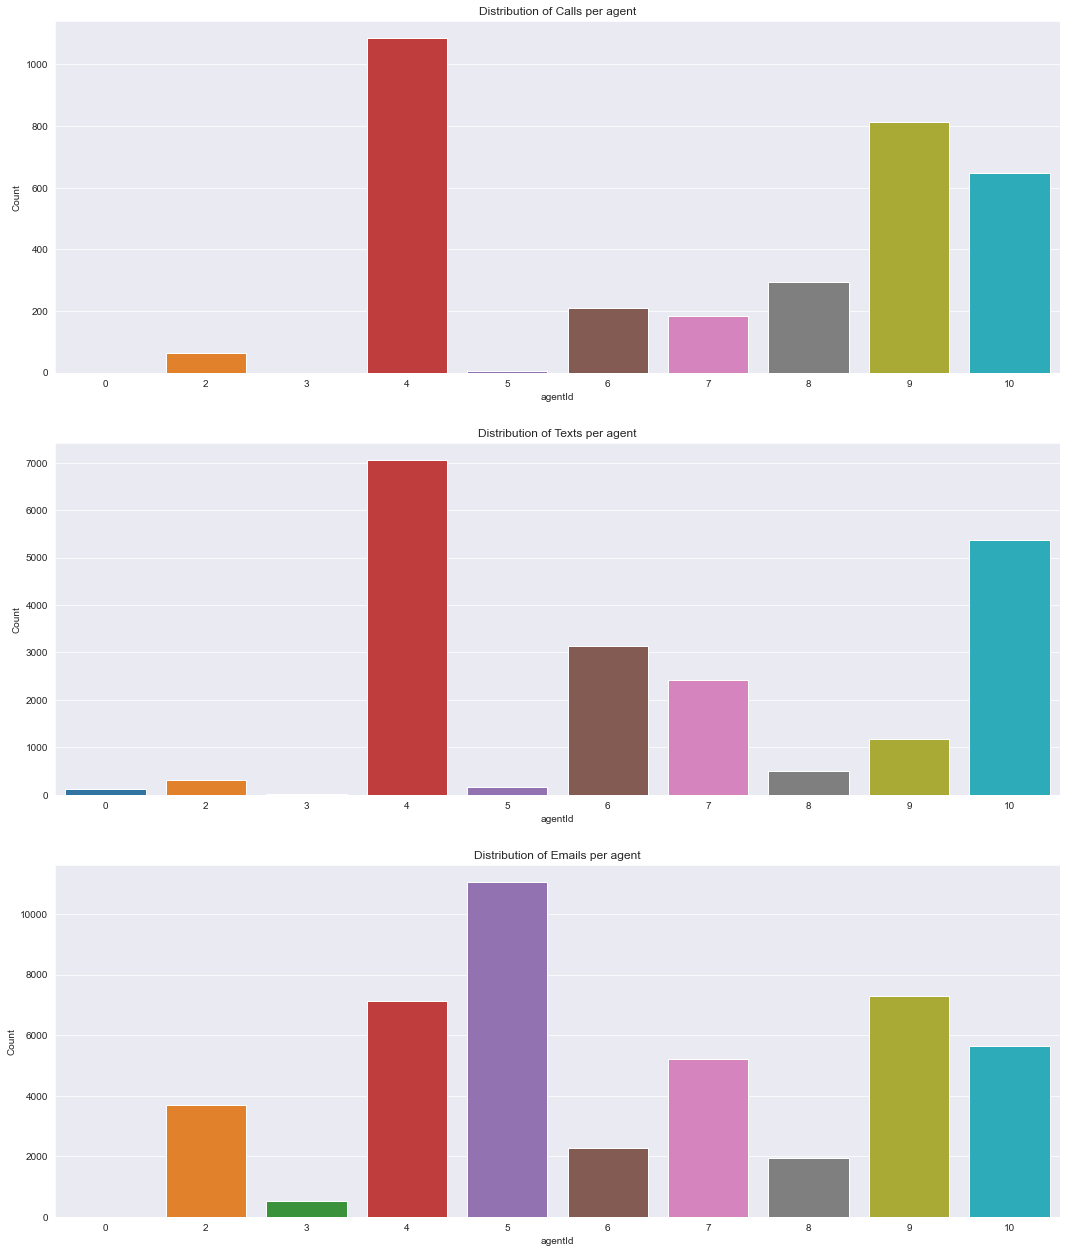

In [254]:
fig, axes = plt.subplots(3, 1, figsize = (18, 22))
for name, ax in zip(['Calls', 'Texts', 'Emails'], axes):
    sns.barplot(x = count_df.index, y = count_df[name], ax = ax)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of ' + str(name) + ' per agent')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Distribution of Followup Type per Agent.png'))

# Finding useful information from DateTime columns

followup_date and lead_created_at are both datetime strings. First, we need to convert them and extract useful information from it so that we can subtract the values and get a column which shows the delay in following up.

In [255]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


Here, we can find the difference between creation of lead and the followup time for each lead by subtracting the lead_created_at from followup_date. This can give us an idea on how much average time an agent takes to follow up on their lead. 

In [256]:
df['followup_date'] = pd.to_datetime(df['followup_date'])
df['followup_date'] = df['followup_date'].dt.date
df['lead_created_at'] = pd.to_datetime(df['lead_created_at'], utc=True) #UTC = True because tz information in the column
df['lead_created_at'] = df['lead_created_at'].dt.date

Here, since we are dealing in number of days, it doesn't make sense to keep the time information in the columns. Hence, I have only kept the Date part in the datetime columns.

In [257]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [258]:
#Timedelta[ns]
df['follow_up_delay (days)'] = (df['followup_date'] - df['lead_created_at']).dt.days

In [259]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,follow_up_delay (days)
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}",1
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1355


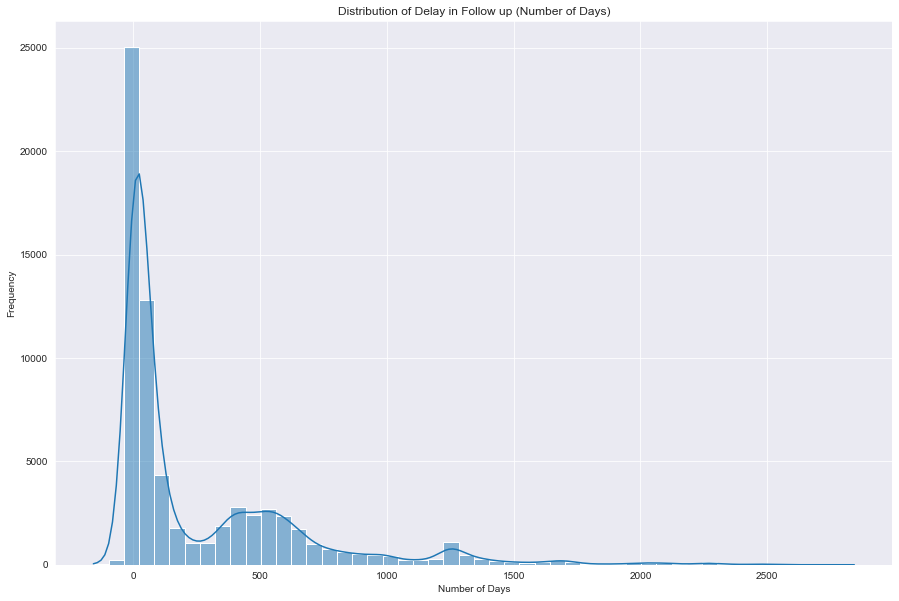

In [260]:
#Distribution to see if follow_up_delay is a normal distribution or not. 
plt.figure(figsize=(15, 10))
ax = sns.histplot(x = df['follow_up_delay (days)'], bins = 50, kde=True)
ax.set_title('Distribution of Delay in Follow up (Number of Days)')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Frequency')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Distribution of Delay in Follow up.png'))

In [261]:
#Highly right skewed data. Thus median a better indicator.
delay_per_agent = df.groupby('agentId')['follow_up_delay (days)'].median()
delay_per_agent

agentId
0      60.0
2      25.0
3     392.0
4     283.5
5       8.0
6      26.0
7     410.0
8      25.0
9      66.0
10    166.0
Name: follow_up_delay (days), dtype: float64

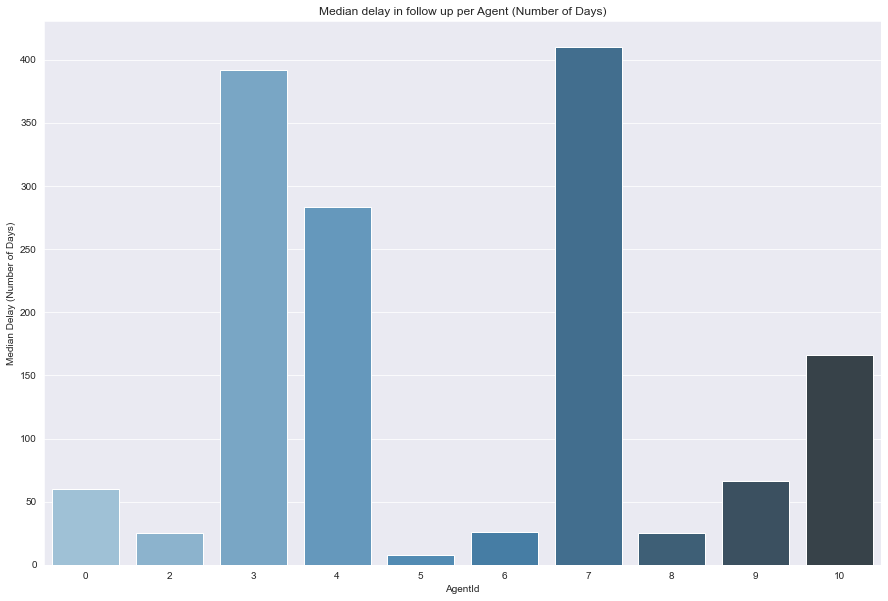

In [262]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = delay_per_agent.index, y = delay_per_agent.values, palette='Blues_d')
ax.set_title('Median delay in follow up per Agent (Number of Days)')
ax.set_xlabel('AgentId')
ax.set_ylabel('Median Delay (Number of Days)')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Median delay in follow up per agent.png'))

## Useful information in additional_data

In [263]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,follow_up_delay (days)
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}",1
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1355


In [264]:
#Convert the string to dictionary and then expand into 2 new columns named Duration and isIncoming
df[['duration', 'isIncoming']] = df['additional_data'].map(eval).apply(pd.Series)

In [265]:
df.drop(columns = 'additional_data', inplace = True)

In [266]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),duration,isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0,False
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0,False
2,3,2020-01-06,2019-12-26,49122,calls,4,11,91.0,False
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0,False
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0,False


In [267]:
df['duration'].isnull().sum() / len(df['duration']) * 100

95.16487696404015

In [268]:
df['duration'].fillna(0, inplace = True)

Since, 65000 (95%) rows in Duration columns are Null, it is okay to remove duration from our analysis as it wouldnot contribute much to the analysis. 

In [269]:
df = df.drop(columns = 'duration')

If agent calls their leads then isIncoming = 0 else 1

In [270]:
df['isIncoming'] = df['isIncoming'].astype(float)
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0
2,3,2020-01-06,2019-12-26,49122,calls,4,11,0.0
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0


In [271]:
calls_to_leads = df.groupby('agentId')['isIncoming'].sum()
calls_to_leads

agentId
0      115.0
2      341.0
3       24.0
4     3405.0
5      133.0
6     2257.0
7     4711.0
8      160.0
9     2215.0
10    3780.0
Name: isIncoming, dtype: float64

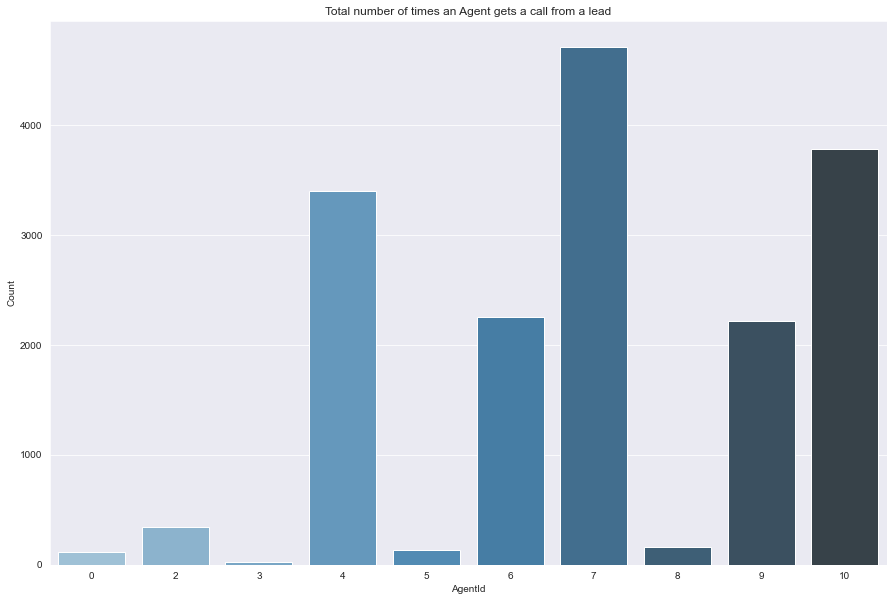

In [272]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = calls_to_leads.index, y = calls_to_leads.values, palette='Blues_d')
ax.set_title('Total number of times an Agent gets a call from a lead')
ax.set_xlabel('AgentId')
ax.set_ylabel('Count')
plt.savefig(os.path.join(os.path.dirname(pwd), 'viz', 'Total number of times an Agent gets a call from a lead.png'))

# Ranking the Agents

Now, we have many different variables on which we can calculate an agents performance. The most basic algorithm would be to rank each agent based on a criteria and give them a score. I will do this for all such variables and then get the top 3 agents based on highest score achieved. 

In [273]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0
2,3,2020-01-06,2019-12-26,49122,calls,4,11,0.0
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0


In [274]:
rank_follow_up = num_follow_ups.rank()
rank_follow_up

4     10.0
10     9.0
5      8.0
9      7.0
7      6.0
6      5.0
2      4.0
8      3.0
3      2.0
0      1.0
Name: agentId, dtype: float64

In [275]:
rank_leads_per_agent = leads_per_agent.sort_values(ascending = False).rank()
rank_leads_per_agent

agentId
4     10.0
10     9.0
9      8.0
2      7.0
8      6.0
5      5.0
7      4.0
6      3.0
3      2.0
0      1.0
Name: leadId, dtype: float64

In [276]:
rank_median_delay = delay_per_agent.sort_values().rank(method = 'first', ascending = False)
rank_median_delay

agentId
5     10.0
2      8.0
8      9.0
6      7.0
0      6.0
9      5.0
10     4.0
4      3.0
3      2.0
7      1.0
Name: follow_up_delay (days), dtype: float64

In [277]:
rank_agent_incoming_calls = calls_to_leads.sort_values(ascending=False).rank()
rank_agent_incoming_calls

agentId
7     10.0
10     9.0
4      8.0
6      7.0
9      6.0
2      5.0
8      4.0
5      3.0
0      2.0
3      1.0
Name: isIncoming, dtype: float64

In [278]:
mapping = count_df.copy()
mapping['total'] = mapping.apply(lambda x : (x['Calls']*3 + x['Texts']*2 + x['Emails']*1), axis = 1)
mapping['total']

agentId
0       230.0
2      4531.0
3       542.0
4     24527.0
5     11423.0
6      9166.0
7     10614.0
8      3812.0
9     12084.0
10    18327.0
Name: total, dtype: float64

In [281]:
rank_followup_type = mapping['total'].sort_values(ascending=False).rank()
rank_followup_type

agentId
4     10.0
10     9.0
9      8.0
5      7.0
7      6.0
6      5.0
2      4.0
8      3.0
3      2.0
0      1.0
Name: total, dtype: float64

In [282]:
ranks = pd.DataFrame({'Number of Follow Ups': rank_follow_up, 'Number of Leads': rank_leads_per_agent, 'Median Delay': rank_median_delay, 'Incoming Calls': rank_agent_incoming_calls, 'Total of Calls/Mails/Texts': rank_followup_type})

In [283]:
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts
0,1.0,1.0,6.0,2.0,1.0
2,4.0,7.0,8.0,5.0,4.0
3,2.0,2.0,2.0,1.0,2.0
4,10.0,10.0,3.0,8.0,10.0
5,8.0,5.0,10.0,3.0,7.0
6,5.0,3.0,7.0,7.0,5.0
7,6.0,4.0,1.0,10.0,6.0
8,3.0,6.0,9.0,4.0,3.0
9,7.0,8.0,5.0,6.0,8.0
10,9.0,9.0,4.0,9.0,9.0


In [284]:
ranks.index.name = 'AgentID'

In [285]:
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts
AgentID,,,,,
0,1.0,1.0,6.0,2.0,1.0
2,4.0,7.0,8.0,5.0,4.0
3,2.0,2.0,2.0,1.0,2.0
4,10.0,10.0,3.0,8.0,10.0
5,8.0,5.0,10.0,3.0,7.0
6,5.0,3.0,7.0,7.0,5.0
7,6.0,4.0,1.0,10.0,6.0
8,3.0,6.0,9.0,4.0,3.0
9,7.0,8.0,5.0,6.0,8.0


In [287]:
ranks['Total'] = ranks.sum(axis = 1)
ranks.head()

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts,Total
AgentID,,,,,,
0,1.0,1.0,6.0,2.0,1.0,22.0
2,4.0,7.0,8.0,5.0,4.0,56.0
3,2.0,2.0,2.0,1.0,2.0,18.0
4,10.0,10.0,3.0,8.0,10.0,82.0
5,8.0,5.0,10.0,3.0,7.0,66.0


In [289]:
ranks = ranks.sort_values('Total', ascending = False)
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts,Total
AgentID,,,,,,
4,10.0,10.0,3.0,8.0,10.0,82.0
10,9.0,9.0,4.0,9.0,9.0,80.0
9,7.0,8.0,5.0,6.0,8.0,68.0
5,8.0,5.0,10.0,3.0,7.0,66.0
2,4.0,7.0,8.0,5.0,4.0,56.0
6,5.0,3.0,7.0,7.0,5.0,54.0
7,6.0,4.0,1.0,10.0,6.0,54.0
8,3.0,6.0,9.0,4.0,3.0,50.0
0,1.0,1.0,6.0,2.0,1.0,22.0


In [292]:
top3 = ranks['Total'].nlargest(3)

In [300]:
print ('Top 3 Agent IDs :\n' )
for agent in top3.index:
    print (agent)

Top 3 Agent IDs :

4
10
9
